In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import datetime
import matplotlib.pyplot as plt
import statistics

### surppress warnings
warnings.filterwarnings('ignore')

### Data source

In [2]:
data_dir = '../../data/hackthon/'
file_name = data_dir + [file for file in os.listdir(data_dir) if "csv" in file][0]

### raw_data
raw_data = pd.read_csv(file_name)

In [3]:
### create copy
data = raw_data.copy()

### Calculate fields

### 1. Create datatime

Calculate Fields

In [4]:
def change_datetime_type(df):

    df['Registration_Dt'] = pd.to_datetime(df['Registration_Dt'] , format = '%Y-%m-%d')
    df['first_report'] = pd.to_datetime(df['first_report'] , format = '%Y-%m-%d')
    df['last_report'] = pd.to_datetime(df['last_report'] , format = '%Y-%m-%d')
    df['enrolled_on_date'] = pd.to_datetime(df['enrolled_on_date'] , format = '%Y/%m/%d')
    df['subscription_date'] = pd.to_datetime(df['subscription_date'] , format = '%Y/%m/%d')
    df['unsubscribe_date'] = pd.to_datetime(df['unsubscribe_date'] , format = '%Y/%m/%d')
    df['obsolete_date'] = pd.to_datetime(df['obsolete_date'] , format = '%Y/%m/%d')
   
    df = df.sort_values(by = 'Registration_Dt' , ascending = True)
    
    return df

In [5]:
data = change_datetime_type(data)

2. Make columns:
    - Printer Total
    - HW Revenue
    - First Purchase Date
    - Last Purchase Date

In [6]:
def make_columns(df):
    ### surppress warnings
    warnings.filterwarnings('ignore')
    
    df['Printer Total'] = df.groupby('MDM ID')['Serial Number'].transform('nunique')
    df['HW Revenue'] = df.groupby('MDM ID')['Product Price'].transform('sum')
    df['First Purchase Date'] = df.groupby('MDM ID')['Registration_Dt'].transform('min')
    df['Last Purchase Date'] = df.groupby('MDM ID')['Registration_Dt'].transform('max')
    
    return df

### ERD

In [7]:
data.groupby('user_sub_environment').size()

user_sub_environment
Home Business           251553
Home Personal          1561605
Home Unknown             61891
Office < 10              44837
Office >= 10             12175
Office Size Unknown      83061
Unknown                 154704
dtype: int64

In [8]:
data.shape

(2169826, 75)

In [9]:
pd.set_option('display.max_rows' , data.shape[1])
data.head(n = 3).T

,1173696,964660,1700228
MDM ID,408b75732d2e3cea4582a0d12c0c469b,32bf08babc643e11a17d96f90d9af509,5a90c76bf62ca1324f7145238b80e777
Serial Number,bded707458a4e22554e644d6983ded9d,17e27cb567a462c3e79819d17dedbdd5,f48a381556c04a0ea2de8891935b6e69
Printer Total,NaN,NaN,NaN
HW Revenue,NaN,NaN,NaN
Registration_Dt,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
First Purchase Date,NaN,NaN,NaN
Last Purchase Date,NaN,NaN,NaN
Product ID,M2U75A,3UC65A,D3Q20A
Product Category NM,Multifunction and All-in-One,Multifunction and All-in-One,Multifunction and All-in-One
Product Line NM,NaN,NaN,NaN


### Check for empty values

In [10]:
def create_nan_view(df , over_percent = 0):
    df = pd.DataFrame({"Feature" : df.columns , "nan%" : list(df.isna().sum() * 100 / len(df))})
    df = df.sort_values(by = "nan%")
    df = df[df["nan%"] > over_percent]
    return df

In [11]:
pd.set_option('display.max_rows' , data.shape[1])
nan_df = create_nan_view(data)
nan_df

,Feature,nan%
55,lifetime_loyalty_class,0.002120
12,Product Price,10.970004
62,hp_share,25.926733
68,subscription_id,63.254888
69,enrolled_on_date,63.254888
73,subscription_state,63.254888
74,current_plan,63.254888
18,Zip Code,67.258112
70,subscription_date,72.899762
20,Household Size,76.228232


**set cut off benchmark**

-> first remove those 100% NaN values

In [12]:
### list of 100% nan columns
complete_nan = list(nan_df[nan_df["nan%"] == 100]['Feature'])

### drop columns
data = data.drop(complete_nan , axis = 1)

#### New shape

In [13]:
data.shape

(2169826, 68)

In [14]:
print("columns dropped :")
for c_name_index in range(len(complete_nan)):
    print(f"  {c_name_index + 1} : {complete_nan[c_name_index]}")

columns dropped :
  1 : High Tech Living
  2 : Home Improvement
  3 : Product Line NM
  4 : Last Purchase Date
  5 : First Purchase Date
  6 : HW Revenue
  7 : Printer Total


## Keep only users that have propensity scores

In [15]:
### all BP and PP related columns
BPP_list = [P for P in data.columns if ("PP" in P) | ("BP" in P)]

### subsetting with BPP_list
sub_data = data.dropna(subset = BPP_list)

In [16]:
sub_data.shape

(198414, 68)

In [17]:
create_nan_view(sub_data)

,Feature,nan%
48,lifetime_loyalty_class,0.002016
7,Product Price,9.247835
21,High Ticket Merchandise,9.321419
22,Low Ticket Merchandise,9.321419
44,IBE2061_MASTERCARD_GOLD,9.321419
46,IBE2062_VISA_GOLD,9.321419
15,Household Size,9.321419
40,IBE2058_AMEX_GOLD,9.321419
41,IBE2058_AMEX_REGULAR,9.321419
42,IBE2059_DISCOVER_GOLD,9.321419


### First level filter, deal with:

1. subscription state:
   - if subscription is na, we fill "unknow"
   
2. current plan:
   - if current plan is na, we fill "no plan"

3. create new column: **[subscription_length]** with column **[obsolete_date]** and **column [enrolled_on_date]** and drop other related columns:
    - enrolled_on_date
    - subscription_date
    - unsubscribe_date
    - obsolete_date
    - supply_selectability_number

4. subscription_id:
    - convert to binomial measure, 1 if has id, else 0

In [18]:
def fill_na_lvl1(df):
    ### subscription state
    df['subscription_state'] = df['subscription_state'].apply(lambda x : "unknown" if pd.isna(x) == True else x)
    
    ### current plan
    df['current_plan'] = df['current_plan'].apply(lambda x : "no plan" if pd.isna(x) == True else x)
    
    ### make column "subscription_length"
    ### fill obsolete_date for those subbed and haven't unsub
    ### -> find those having non-empty "enrolled_on_date" and empty "obsolete_date", fill them with today's date
    df['obsolete_date'] = df['obsolete_date'].fillna(datetime.datetime.now()).where(df['enrolled_on_date'].notnull())
    
    df['subscription_length'] = df['obsolete_date'] - df['enrolled_on_date']
    df['subscription_length'] = df['subscription_length'].apply(lambda x : 0 if pd.isna(x) == True else x.days)
    
    ### drop columns
    df = df.drop(['enrolled_on_date' , 
                  'subscription_date' ,
                  'unsubscribe_date' ,
                  'obsolete_date' ,
                  'supply_selectability_number'] , axis = 1)
    
    ### subscription id
    df['subscription_id'] = df['subscription_id'].apply(lambda x : 0 if pd.isna(x) == True else 1)
    
    return df

In [19]:
lvl1_sub_data = fill_na_lvl1(sub_data)

### check nan view
create_nan_view(lvl1_sub_data)

,Feature,nan%
48,lifetime_loyalty_class,0.002016
7,Product Price,9.247835
47,IBE2062_VISA_REGULAR,9.321419
46,IBE2062_VISA_GOLD,9.321419
45,IBE2061_MASTERCARD_REGULAR,9.321419
43,IBE2059_DISCOVER_REGULAR,9.321419
42,IBE2059_DISCOVER_GOLD,9.321419
41,IBE2058_AMEX_REGULAR,9.321419
44,IBE2061_MASTERCARD_GOLD,9.321419
22,Low Ticket Merchandise,9.321419


### Second level filter

1. Drop all customers without lifetime_loyalty_class:
    - only 0.002016% missing
   
2. Fill "Product Price":
    - For those product that we've seen before, and have prices, we use average the price we seen before and parse it into those don't have value.
    - Fill with median for those products we've never seen before.
    
3. Credit card related:
    - drop all na values

4. High or Low ticket merchandise:
    - drop all na values
    
5. Drop age:
    - completely zero

In [20]:
def fill_na_lvl2(df):
    ### drop na loyalty
    df = df.dropna(subset = ['lifetime_loyalty_class'])    
        
    ### fill product price
    
    ### this is the mapping table
    price_mapping = df[df['Product Price'].isnull() == False].groupby('Product NM')["Product Price"].mean()
    
    ### fill product with average prices
    df.loc[df['Product Price'].isnull(), 'Product Price'] =\
        df.loc[df['Product Price'].isnull(), 'Product NM'].map(price_mapping)

    ### fill others with median
    df['Product Price'] = df['Product Price'].fillna(value = df['Product Price'].median())
    
    ### drop all na values for credit card info
    ### credit card related features (using key word IBE)
    c_card_feature = [c_card for c_card in df.columns if "IBE" in c_card]
    df = df.dropna(subset = c_card_feature)
    
    ### drop all na values for Ticket info
    ticket_feature = [ticket for ticket in df.columns if "Ticket" in ticket]
    df = df.dropna(subset = ticket_feature)
    
    ### drop age
    df.drop('Age' , axis = 1 , inplace = True)
    
    ### drop NA gender and education
    df = df.dropna(subset = ['Gender' , 'Education'])  
    
    ### remove zip code
    df.drop('Zip Code' , axis = 1 , inplace = True)
    
    return df

### Product Price

<AxesSubplot: ylabel='Frequency'>

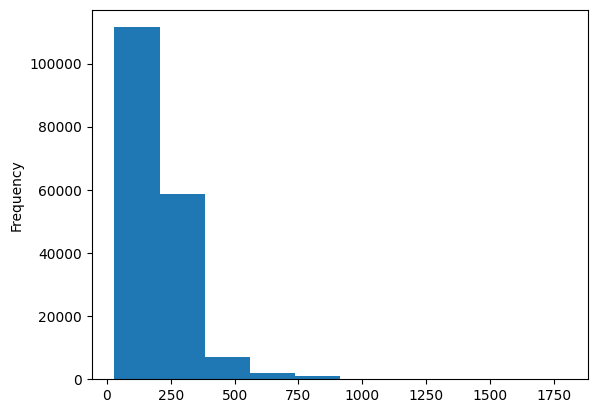

In [21]:
lvl1_sub_data['Product Price'].plot(kind = 'hist')

### Credit Card

In [22]:
### credit card related features (using key word IBE)
c_card_feature = [c_card for c_card in lvl1_sub_data.columns if "IBE" in c_card]

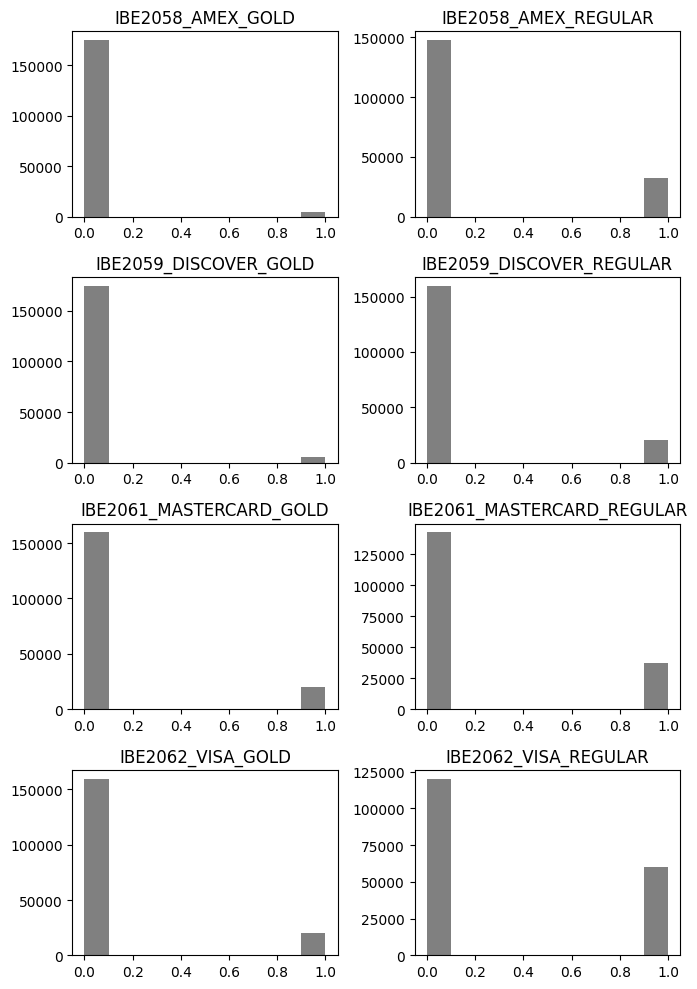

In [23]:
plt.rcParams["figure.figsize"] = [7 , 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.grid'] = False

fig, axes = plt.subplots(4, 2)


counter = 0
for card in c_card_feature:
    lvl1_sub_data.hist(card , ax = axes[int(counter / 2) , counter % 2] ,
                      grid = False,
                      color = 'grey')
    counter = counter + 1

### High or Low Ticket Merchandise

Text(0.5, 1.0, 'High Ticket Merchandise')

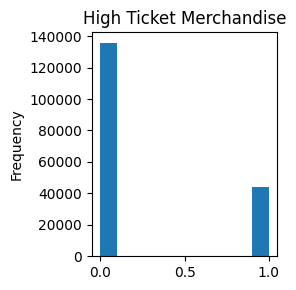

In [24]:
plt.rcParams["figure.figsize"] = [3 , 3]
lvl1_sub_data['High Ticket Merchandise'].plot(kind = 'hist')

plt.title("High Ticket Merchandise")

Text(0.5, 1.0, 'Low Ticket Merchandise')

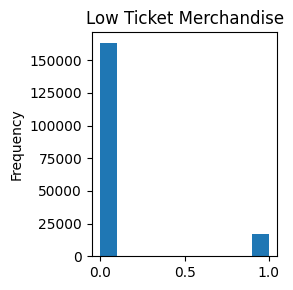

In [25]:
plt.rcParams["figure.figsize"] = [3 , 3]
lvl1_sub_data['Low Ticket Merchandise'].plot(kind = 'hist')

plt.title("Low Ticket Merchandise")

In [26]:
lvl2_sub_data = fill_na_lvl2(lvl1_sub_data)

### check nan view
create_nan_view(lvl2_sub_data)

,Feature,nan%
9,Household Income,10.647995
17,Computers,17.191853
52,hp_share,23.488488
14,Reading General,23.888755
24,Number of Children,26.153010
22,Exercise Health,32.955864
21,Sports,35.538538
15,Crafts,43.559572
23,Movie Music,43.898173
11,Occupation,49.175641


### Third level filter

1. For Household income:
    - drop A, B, C, D
    - fill with median
   
2. Drop Location Desc:
    - information hard to interpret
    
3. For rest of the features, we fill with 0

In [27]:
def fill_na_lvl3(df):
    
    ### Household income, fill with median and drop ABCD
    value_to_drop = ['A' , 'B' , 'C' , 'D']
    df = df[~df['Household Income'].isin(value_to_drop)]
    df['Household Income'] = df['Household Income'].fillna(value = df['Household Income'].median())
    
    ### drop location desc
    df.drop('Location Desc' , axis = 1 , inplace = True)
    
    
    ### column names of rest of the feautres
    feature_list = list(create_nan_view(df)['Feature'])
    
    ### fill with 0
    for feature in feature_list:
        df[feature] = df[feature].fillna(value = 0)
    
    return df

Household Income  : unprintable


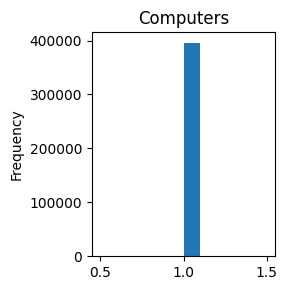

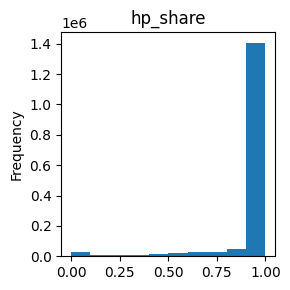

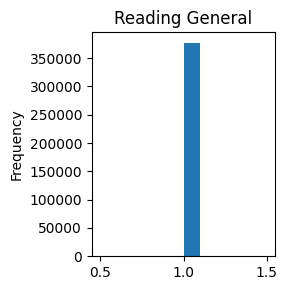

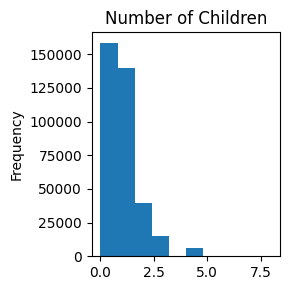

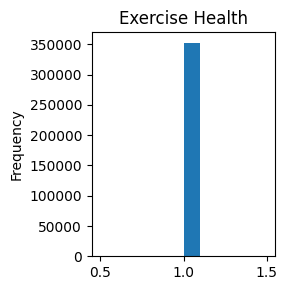

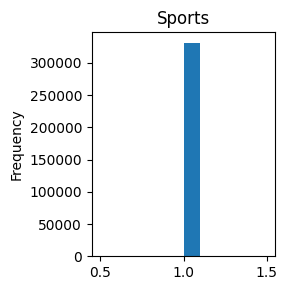

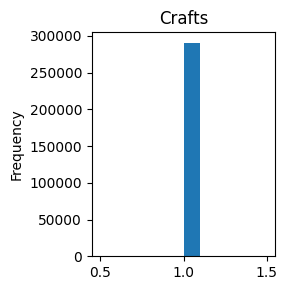

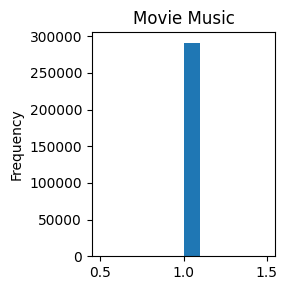

Occupation  : unprintable


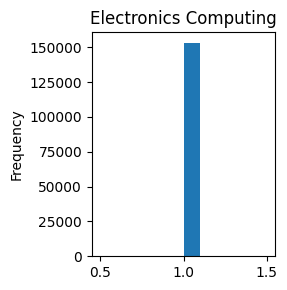

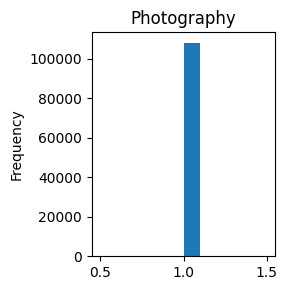

Location Desc  : unprintable


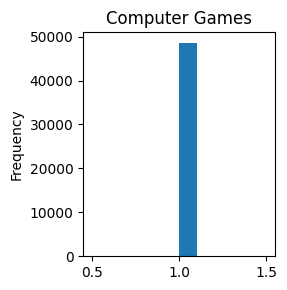

In [28]:
### get rest of the features that hold na values
lv2_view = create_nan_view(lvl2_sub_data)
tf_list = list(lv2_view['Feature'])

### check distribution of data
for feature in tf_list:
    try:
        data[feature].plot(kind = 'hist')
        plt.title(feature)
        plt.show()
    
    except:
        print(feature, " : unprintable")

In [29]:
final_data = fill_na_lvl3(lvl2_sub_data)

create_nan_view(final_data , -1)

,Feature,nan%
0,MDM ID,0.0
32,BP Printers Brother,0.0
33,BP Priners Canon,0.0
34,BP Printers Epson,0.0
35,BP PC Acer,0.0
36,BP PC Lenovo,0.0
37,IBE2058_AMEX_GOLD,0.0
38,IBE2058_AMEX_REGULAR,0.0
39,IBE2059_DISCOVER_GOLD,0.0
40,IBE2059_DISCOVER_REGULAR,0.0


In [30]:
final_data = make_columns(final_data)

## NA all cleared!

In [31]:
final_data.to_csv("cleaned_data_v5.csv" , index = False)